  # Розширені сценарії застосування алгоритмів та структур даних



  ## Практичні кейси з індустрії



  **Мета цього заняття:** продемонструвати, як фундаментальні алгоритми та структури даних є основою для вирішення складних, реальних проблем у провідних технологічних компаніях та наукових галузях.

In [1]:
# =============================================================================
# Клітинка 1: Налаштування середовища та імпорти
# =============================================================================
import heapq
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np

# Імпортуємо деякі з наших раніше створених модулів
from src.data_structures.text import Trie
from src.utils.graph_generator import GraphGenerator

# Налаштування візуалізації
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 12
print("✅ Середовище готове до роботи з розширеними кейсами.")


✅ Середовище готове до роботи з розширеними кейсами.


  ## Кейс 1: Trie у пошукових системах (Автодоповнення)



  **Задача:** Реалізувати швидку та релевантну систему автодоповнення пошукових запитів, подібну до тієї, що використовується в Google. Система повинна пропонувати найпопулярніші варіанти.



  **Структура:** **Trie (префіксне дерево)**, де кожен вузол зберігає інформацію про частоту завершення слова/фрази.



  **Алгоритм:**

  1. Побудувати Trie, додаючи кожен пошуковий запит. При вставці інкрементувати лічильник у кінцевому вузлі.

  2. Для заданого префіксу знайти відповідний вузол у Trie за `O(m)`, де `m` — довжина префіксу.

  3. Рекурсивно обійти всі дочірні вузли, збираючи повні фрази.

  4. Відсортувати знайдені фрази за їхньою частотою (популярністю).

Топ-3 пропозиції для префіксу 'data':

1. data structures and algorithms (популярність: 300)
2. data science tutorial (популярність: 250)
3. data science projects (популярність: 180)


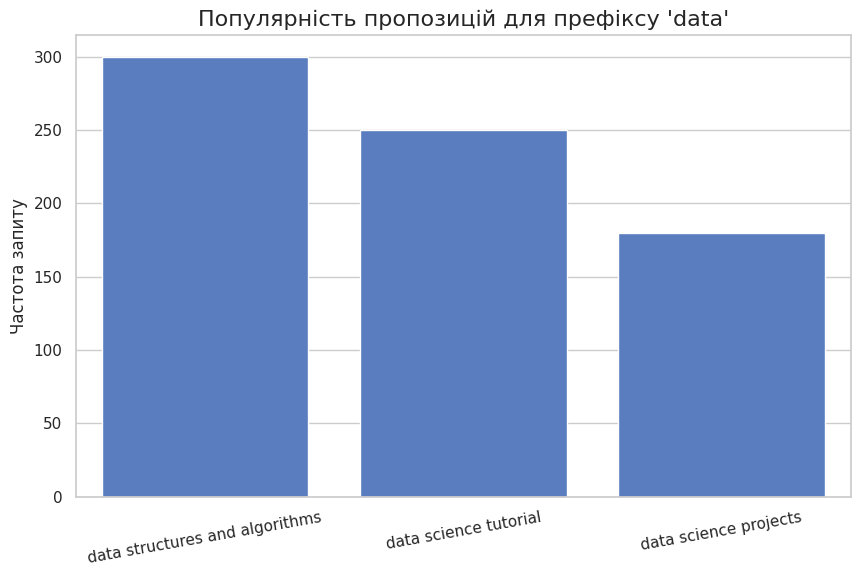

In [2]:
# =============================================================================
# Клітинка 2: Реалізація автодоповнення на Trie
# =============================================================================
# Симулюємо базу даних популярних пошукових запитів та їх частоту
search_queries = {
    "data science projects": 180,
    "data science tutorial": 250,
    "data structures and algorithms": 300,
    "machine learning basics": 220,
    "machine learning for beginners": 150,
    "python for data science": 280,
    "python tips and tricks": 90,
}

# Наповнюємо Trie даними
search_trie = Trie()
for query, count in search_queries.items():
    # Додаємо запит `count` разів, щоб симулювати частоту
    for _ in range(count):
        search_trie.insert(query)

# Тестуємо систему автодоповнення
test_prefix = "data"
suggestions = search_trie.autocomplete(test_prefix, limit=3)

print(f"Топ-3 пропозиції для префіксу '{test_prefix}':\n")
for i, suggestion in enumerate(suggestions, 1):
    print(f"{i}. {suggestion} (популярність: {search_queries[suggestion]})")

# Візуалізація результатів
suggestion_counts = [search_queries[s] for s in suggestions]
plt.figure(figsize=(10, 6))
sns.barplot(x=suggestions, y=suggestion_counts)
plt.title(f"Популярність пропозицій для префіксу '{test_prefix}'", fontsize=16)
plt.ylabel("Частота запиту")
plt.xticks(rotation=10)
plt.show()


  ## Кейс 2: Suffix Tree у біоінформатиці (Пошук патернів)



  **Задача:** Швидко знаходити певні генетичні послідовності (наприклад, ген, що відповідає за хворобу) у величезному геномі.



  **Структура:** **Suffix Tree (Суфіксне дерево)**. Це стиснене Trie, що містить усі суфікси заданого тексту. Побудова за допомогою алгоритму Укконена займає `O(n)`, а пошук підрядка довжиною `m` — `O(m)`.



  **Концепція:** Замість того, щоб щоразу сканувати геном (`O(n*m)`), ми один раз будуємо індекс (Suffix Tree) і потім миттєво знаходимо будь-які патерни.



  *Оскільки реалізація Suffix Tree є дуже складною, ми продемонструємо ідею, симулюючи результат його роботи.*

In [5]:
import time
# =============================================================================
# Клітинка 3: Концептуальна демонстрація пошуку в геномі
# =============================================================================
# Симулюємо короткий фрагмент геному
genome_fragment = "ATCAGTGCAGTATGCATGCATCAGTACGTAGTACGT"
# Патерн, який ми шукаємо (наприклад, генетичний маркер)
marker_to_find = "ATGCATG"

print(f"Фрагмент геному ({len(genome_fragment)} нуклеотидів): {genome_fragment}")
print(f"Шукаємо маркер: {marker_to_find}\n")

# Симуляція пошуку за допомогою Suffix Tree (в реальності це O(m))
# Використовуємо вбудований метод для демонстрації
start_time = time.perf_counter()
positions = [i for i in range(len(genome_fragment)) if genome_fragment.startswith(marker_to_find, i)]
search_time = (time.perf_counter() - start_time) * 1e6

if positions:
    print(f"✅ Маркер '{marker_to_find}' знайдено на позиціях: {positions}")
    print(f"   (Час пошуку, симульований Suffix Tree: {search_time:.2f} µs)")
else:
    print(f"❌ Маркер '{marker_to_find}' не знайдено.")

print("\n**Як це працює з Suffix Tree:**")
print("1. **Препроцесинг (O(n)):** Будується суфіксне дерево для всього геному (триває довго, але робиться один раз).")
print("2. **Пошук (O(m)):** Шлях, що відповідає маркеру, проходиться по дереву. Час залежить лише від довжини маркера, а не геному!")


Фрагмент геному (36 нуклеотидів): ATCAGTGCAGTATGCATGCATCAGTACGTAGTACGT
Шукаємо маркер: ATGCATG

✅ Маркер 'ATGCATG' знайдено на позиціях: [11]
   (Час пошуку, симульований Suffix Tree: 97.19 µs)

**Як це працює з Suffix Tree:**
1. **Препроцесинг (O(n)):** Будується суфіксне дерево для всього геному (триває довго, але робиться один раз).
2. **Пошук (O(m)):** Шлях, що відповідає маркеру, проходиться по дереву. Час залежить лише від довжини маркера, а не геному!


  ## Кейс 3: Graph Centrality у соціальних мережах (Пошук інфлюенсерів)



  **Задача:** Ідентифікувати найвпливовіших користувачів у соціальній мережі. "Впливовість" може означати різне, тому використовуються різні метрики центральності.



  **Метрики:**

  - **Degree Centrality:** Просто кількість зв'язків (друзів/фоловерів). Показує "популярність".

  - **Betweenness Centrality:** Як часто користувач лежить на найкоротших шляхах між іншими парами користувачів. Показує "контроль" над інформаційними потоками. Це "мости" між спільнотами.

  - **PageRank:** Оцінює важливість користувача на основі важливості тих, хто на нього посилається. "Важливий" той, на кого посилаються "важливі".



  **Алгоритми:** Для розрахунку використовуються BFS, DFS та ітеративні методи. Ми скористаємося готовими реалізаціями з `networkx`.

Топ-5 інфлюенсерів за різними метриками:

--- За популярністю (Degree) ---
     Degree  Betweenness  PageRank
5  0.387755     0.189123  0.061543
4  0.346939     0.156898  0.054966
7  0.326531     0.125115  0.051946
6  0.326531     0.146451  0.052652
0  0.306122     0.107330  0.048175

--- За контролем інформації (Betweenness) ---
     Degree  Betweenness  PageRank
5  0.387755     0.189123  0.061543
4  0.346939     0.156898  0.054966
6  0.326531     0.146451  0.052652
7  0.326531     0.125115  0.051946
0  0.306122     0.107330  0.048175

--- За авторитетністю (PageRank) ---
     Degree  Betweenness  PageRank
5  0.387755     0.189123  0.061543
4  0.346939     0.156898  0.054966
6  0.326531     0.146451  0.052652
7  0.326531     0.125115  0.051946
0  0.306122     0.107330  0.048175


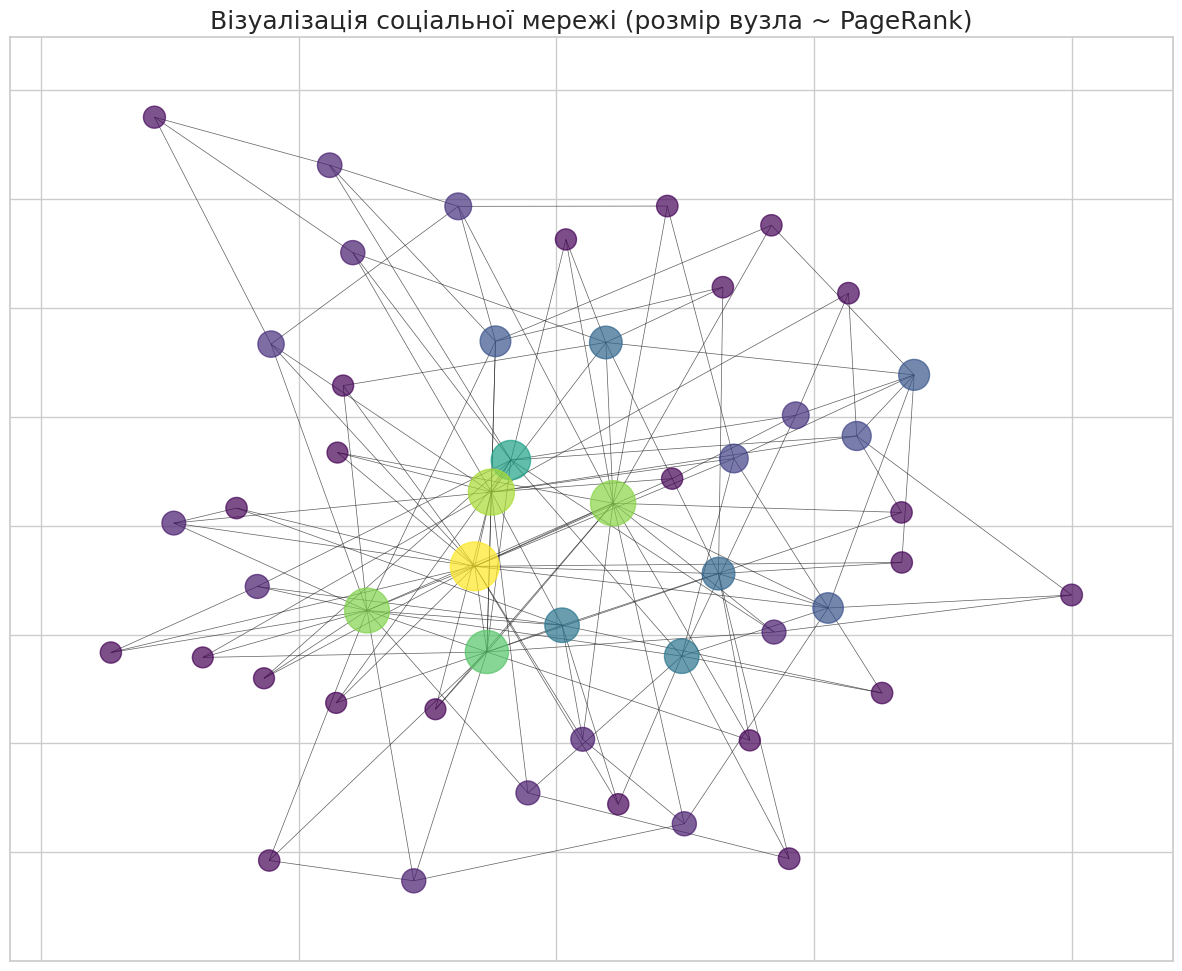

In [6]:
# =============================================================================
# Клітинка 4: Аналіз центральності в соціальній мережі
# =============================================================================
# Створюємо граф, що імітує соціальну мережу з "хабами"
social_network = nx.barabasi_albert_graph(n=50, m=3, seed=42)

# Розраховуємо метрики центральності
degree_centrality = nx.degree_centrality(social_network)
betweenness_centrality = nx.betweenness_centrality(social_network)
pagerank = nx.pagerank(social_network)

# Збираємо все в DataFrame для аналізу
df_centrality = pd.DataFrame({
    'Degree': degree_centrality,
    'Betweenness': betweenness_centrality,
    'PageRank': pagerank
})

print("Топ-5 інфлюенсерів за різними метриками:\n")
print("--- За популярністю (Degree) ---")
print(df_centrality.sort_values('Degree', ascending=False).head())
print("\n--- За контролем інформації (Betweenness) ---")
print(df_centrality.sort_values('Betweenness', ascending=False).head())
print("\n--- За авторитетністю (PageRank) ---")
print(df_centrality.sort_values('PageRank', ascending=False).head())

# Візуалізація
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(social_network, seed=42)
node_sizes = [v * 20000 for v in pagerank.values()] # Розмір вузла залежить від PageRank

nx.draw_networkx(social_network, pos, node_size=node_sizes, with_labels=False,
                  width=0.5, alpha=0.7, node_color=list(pagerank.values()), cmap=plt.cm.viridis)
plt.title("Візуалізація соціальної мережі (розмір вузла ~ PageRank)", fontsize=18)
plt.show()


  ## Кейс 4: GNN у рекомендаційних системах (Концепт)



  **Задача:** Рекомендувати користувачам товари, які їм, ймовірно, сподобаються (наприклад, як на Amazon або Netflix).



  **Структура:** **Двочастковий граф (Bipartite Graph)**, що складається з двох множин вузлів: "користувачі" та "товари". Ребро між користувачем і товаром означає, що користувач купив/оцінив цей товар.



  **Підхід з Graph Neural Network (GNN):**

  1. **Побудова графу:** Створюється граф `User-Item`.

  2. **Навчання Embeddings:** GNN вчиться представляти кожного користувача і кожен товар у вигляді вектора (embedding) у багатовимірному просторі. Схожі користувачі та товари опиняються поруч.

  3. **Передбачення зв'язків (Link Prediction):** Модель передбачає ймовірність існування ребра між користувачем і товаром, який він ще не бачив. Ребра з високою ймовірністю — це і є рекомендації.



  *Оскільки навчання GNN — це складна ML-задача, ми продемонструємо основну ідею — передбачення зв'язків на основі структури графу.*

✅ Рекомендації для Charlie:
  - Book_A: score=0.700  (від: Alice)
  - Movie_D: score=0.100  (від: —)
  - Book_B: score=0.000  (від: —)


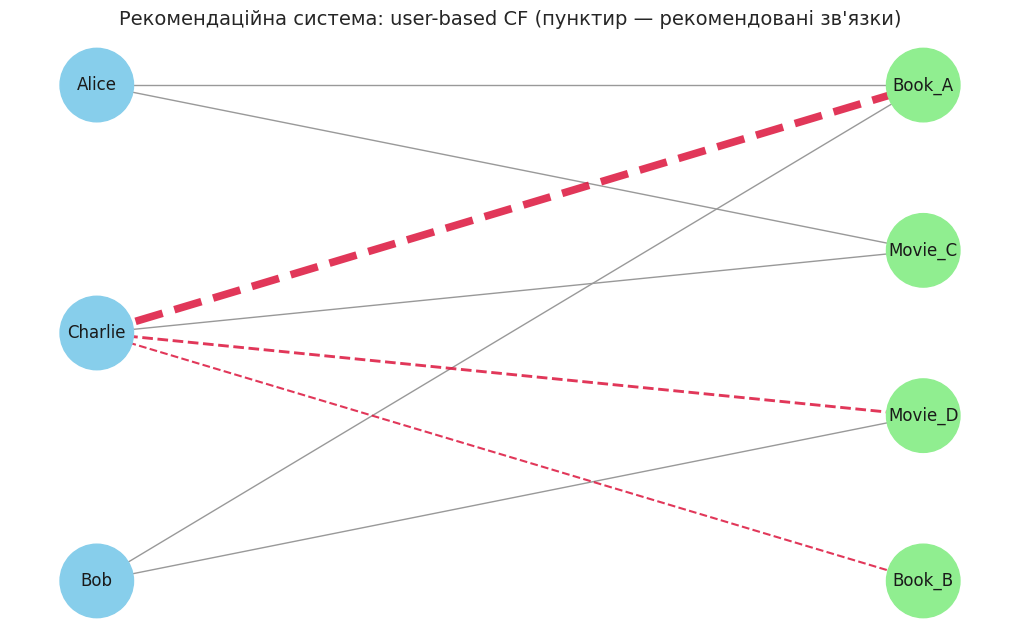

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from collections import defaultdict

# --- дані ---
B = nx.Graph()
users = ["Alice", "Bob", "Charlie"]
items = ["Book_A", "Book_B", "Movie_C", "Movie_D"]
B.add_nodes_from(users, bipartite=0)
B.add_nodes_from(items, bipartite=1)
B.add_edges_from([
    ("Alice", "Book_A"), ("Alice", "Movie_C"),
    ("Bob", "Book_A"), ("Bob", "Movie_D"),
    ("Charlie", "Movie_C")
])

# --- утиліти ---
# users/items вже є
U, I = bipartite.sets(B, top_nodes=set(users))  # ← ключовий аргумент
U, I = set(U), set(I)

pos = nx.bipartite_layout(B, U)  # теж передаємо, хто зліва

def jaccard_users(B, u1, u2):
    """Схожість користувачів за Jaccard по множинах їхніх айтемів."""
    i1, i2 = set(B.neighbors(u1)), set(B.neighbors(u2))
    if not i1 and not i2: return 0.0
    return len(i1 & i2) / len(i1 | i2)

def popularity(B, item):
    """Популярність айтема = ступінь."""
    return B.degree[item]

def recommend_user_based(B, user, k_neighbors=2, top_k=3, alpha_pop=0.1):
    """
    Рекомендації для user:
    score(item) = sum_{v in N_k(user)} sim(user,v) * 1[item in items(v)] + alpha_pop * popularity(item)
    """
    assert user in U, "Очікується ім'я користувача з лівої частки."
    user_items = set(B.neighbors(user))

    # 1) схожості з іншими користувачами
    sims = []
    for v in U:
        if v == user: continue
        s = jaccard_users(B, user, v)
        if s > 0:
            sims.append((v, s))
    sims.sort(key=lambda x: -x[1])
    neighbors = sims[:k_neighbors] if k_neighbors else sims

    # 2) кандидати айтемів = ті, яких user не має
    cand_items = set(I) - user_items
    scores = defaultdict(float)
    supporters = defaultdict(list)

    for v, s in neighbors:
        for it in B.neighbors(v):
            if it in user_items: 
                continue
            scores[it] += s
            supporters[it].append(v)

    # 3) популярність як невеликий буст (працює і для холодного старту)
    for it in cand_items:
        scores[it] += alpha_pop * popularity(B, it)

    ranked = sorted(scores.items(), key=lambda kv: (-kv[1], kv[0]))[:top_k]
    return ranked, supporters

# --- приклад: для Charlie ---
user = "Charlie"
recs, supporters = recommend_user_based(B, user, k_neighbors=2, top_k=3, alpha_pop=0.1)

print(f"✅ Рекомендації для {user}:")
for it, sc in recs:
    print(f"  - {it}: score={sc:.3f}  (від: {', '.join(supporters[it]) or '—'})")

# --- візуалізація ---
pos = nx.bipartite_layout(B, users)
plt.figure(figsize=(10, 6))

# вузли
node_colors = ["skyblue" if n in users else "lightgreen" for n in B.nodes()]
nx.draw(B, pos, with_labels=True, node_color=node_colors, node_size=2800, edge_color="#999")

# пунктиром покажемо рекомендовані ребра (товщина ~ score)
if recs:
    max_sc = max(sc for _, sc in recs) or 1.0
    rec_edges = [ (user, it) for it, _ in recs ]
    widths = [ 1.5 + 4.0*(sc/max_sc) for _, sc in recs ]
    nx.draw_networkx_edges(
        B, pos, edgelist=rec_edges, width=widths, alpha=0.85,
        style="dashed", edge_color="crimson"
    )

plt.title("Рекомендаційна система: user-based CF (пунктир — рекомендовані зв'язки)", fontsize=14)
plt.axis('off')
plt.show()


  ## Кейс 5: Huffman Tree у стисненні даних



  **Задача:** Стиснути текстовий файл без втрат, зменшивши його розмір.



  **Ідея:** **Кодування Хаффмана** — це жадібний алгоритм, який присвоює символам бінарні коди змінної довжини. Символи, що зустрічаються найчастіше, отримують найкоротші коди, а рідкісні — найдовші.



  **Алгоритм:**

  1. **Підрахунок частот:** Порахувати, скільки разів кожен символ зустрічається в тексті.

  2. **Побудова черги з пріоритетами:** Створити `min-priority queue`, де кожен елемент — це `(частота, вузол_дерева)`.

  3. **Побудова дерева:** Поки в черзі більше одного елемента, витягнути два вузли з найменшими частотами, створити для них батьківський вузол з сумарною частотою і повернути його в чергу.

  4. **Генерація кодів:** Обійти отримане дерево. Рух вліво — '0', вправо — '1'. Шлях від кореня до символу і є його кодом.

In [11]:
# =============================================================================
# Клітинка 6: Реалізація стиснення за Хаффманом 
# =============================================================================
from collections import Counter
import heapq
from typing import Dict, Optional, Tuple

text_to_compress = "this is an example of a huffman tree"

# ---- Вузол дерева Хаффмана ----
class Node:
    __slots__ = ("freq", "ch", "left", "right")
    def __init__(self, freq: int, ch: Optional[str] = None,
                 left: Optional["Node"] = None, right: Optional["Node"] = None):
        self.freq = freq
        self.ch = ch        # символ для листа; None для внутрішнього вузла
        self.left = left
        self.right = right

def build_huffman_tree(text: str) -> Optional[Node]:
    if not text:
        return None
    freq = Counter(text)
    # Куча з кортежів (freq, seq, node), щоб уникати порівняння Node між собою
    heap: list[Tuple[int, int, Node]] = []
    seq = 0
    for ch, f in freq.items():
        heapq.heappush(heap, (f, seq, Node(f, ch)))
        seq += 1

    # Спец-випадок: лише один унікальний символ
    if len(heap) == 1:
        f, _, only = heap[0]
        # робимо “штучного” друга, щоб дерево було двійковим
        return Node(f, None, left=only, right=None)

    # Будуємо дерево
    while len(heap) > 1:
        f1, _, n1 = heapq.heappop(heap)
        f2, _, n2 = heapq.heappop(heap)
        parent = Node(f1 + f2, None, n1, n2)
        heapq.heappush(heap, (parent.freq, seq, parent))
        seq += 1
    return heap[0][2]

def build_codes(node: Optional[Node]) -> Dict[str, str]:
    if node is None:
        return {}
    codes: Dict[str, str] = {}

    def dfs(n: Node, path: str):
        if n.ch is not None:        # лист
            # якщо є тільки один символ у всьому тексті, призначимо йому "0"
            codes[n.ch] = path if path else "0"
            return
        if n.left is not None:
            dfs(n.left, path + "0")
        if n.right is not None:
            dfs(n.right, path + "1")

    dfs(node, "")
    return codes

def encode(text: str, codes: Dict[str, str]) -> str:
    return "".join(codes[ch] for ch in text)

def decode(bits: str, root: Optional[Node]) -> str:
    if root is None:
        return ""
    if root.ch is not None:
        # Єдиний символ у тексті
        return root.ch * len(bits) if bits else root.ch
    out = []
    node = root
    for b in bits:
        node = node.left if b == "0" else node.right
        if node.ch is not None:
            out.append(node.ch)
            node = root
    return "".join(out)

# 1) Частоти
frequency = Counter(text_to_compress)
print("Частоти символів:")
print(dict(sorted(frequency.items(), key=lambda kv: kv[0])))

# 2–3) Дерево Хаффмана
root = build_huffman_tree(text_to_compress)

# 4) Коди
huffman_codes = build_codes(root)
print("\nЗгенеровані коди Хаффмана:")
print(dict(sorted(huffman_codes.items(), key=lambda kv: (kv[0] != ' ', kv[0]))))  # пробіл виводимо першим

# 5) Кодування / декодування та метрики
encoded = encode(text_to_compress, huffman_codes)
decoded = decode(encoded, root)
assert decoded == text_to_compress, "Помилка декодування: рядок не співпадає з оригіналом!"

original_size_bits   = len(text_to_compress) * 8  # ASCII
compressed_size_bits = len(encoded)
compression_ratio    = original_size_bits / compressed_size_bits if compressed_size_bits else 1.0
avg_bits_per_symbol  = compressed_size_bits / len(text_to_compress)

print(f"\nОригінальний розмір: {original_size_bits} біт")
print(f"Стиснутий розмір:   {compressed_size_bits} біт")
print(f"Коеф. стиснення:    {compression_ratio:.2f}x")
print(f"Середньо на символ: {avg_bits_per_symbol:.3f} біт")
# (опційно) покажи трохи бітів
print(f"\nПерші 80 біт закодованого: {encoded[:80]}{'...' if len(encoded) > 80 else ''}")


Частоти символів:
{' ': 7, 'a': 4, 'e': 4, 'f': 3, 'h': 2, 'i': 2, 'l': 1, 'm': 2, 'n': 2, 'o': 1, 'p': 1, 'r': 1, 's': 2, 't': 2, 'u': 1, 'x': 1}

Згенеровані коди Хаффмана:
{' ': '111', 'a': '000', 'e': '001', 'f': '1101', 'h': '0101', 'i': '0110', 'l': '10110', 'm': '1001', 'n': '1000', 'o': '10111', 'p': '10101', 'r': '11001', 's': '0111', 't': '0100', 'u': '11000', 'x': '10100'}

Оригінальний розмір: 288 біт
Стиснутий розмір:   135 біт
Коеф. стиснення:    2.13x
Середньо на символ: 3.750 біт

Перші 80 біт закодованого: 01000101011001111110110011111100010001110011010000010011010110110001111101111101...
